In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [4]:
with open("./dataset/kddcup.names",'r') as f:
    f.read()

In [5]:
cols="""duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,
urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,
num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,
srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,
dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,
dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')

In [6]:
df = pd.read_csv("./dataset/kddcup.data.gz",names=columns)
df2=df.drop('num_outbound_cmds',axis=1)

In [14]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [25]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

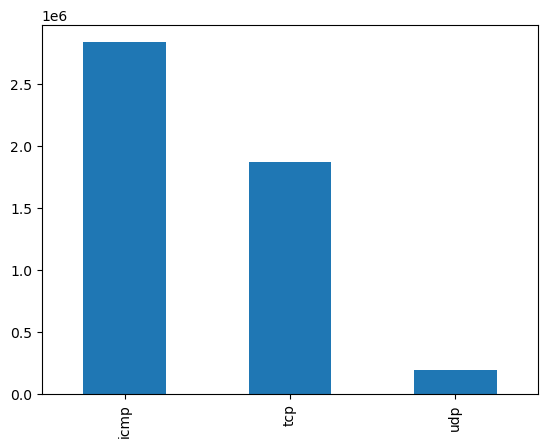

In [26]:
bar_graph('protocol_type')

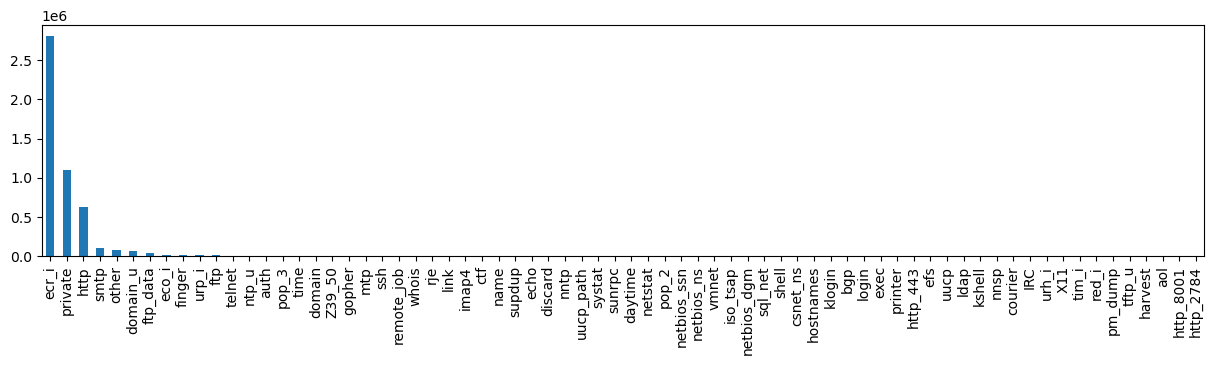

In [27]:
plt.figure(figsize=(15,3))
bar_graph('service')

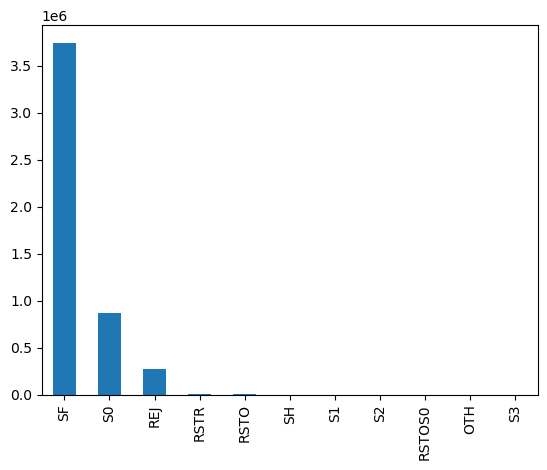

In [28]:
bar_graph('flag')

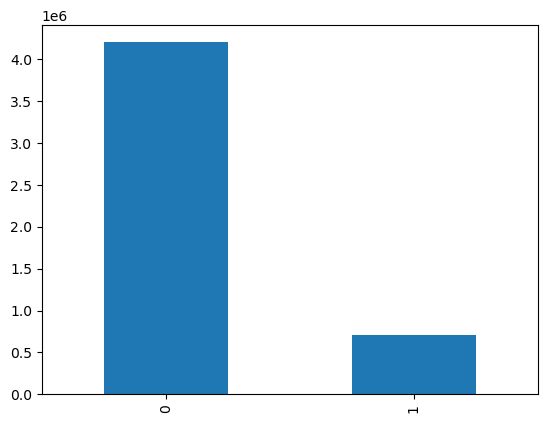

In [29]:
bar_graph('logged_in')

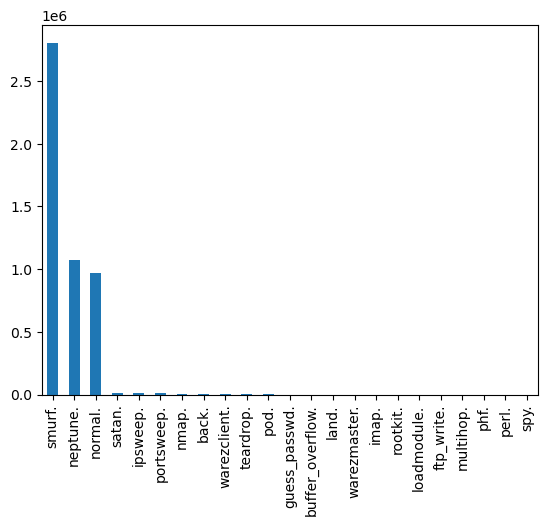

In [30]:
bar_graph('target')

C:\Users\abish\AppData\Local\Temp\ipykernel_8960\3600676833.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr())


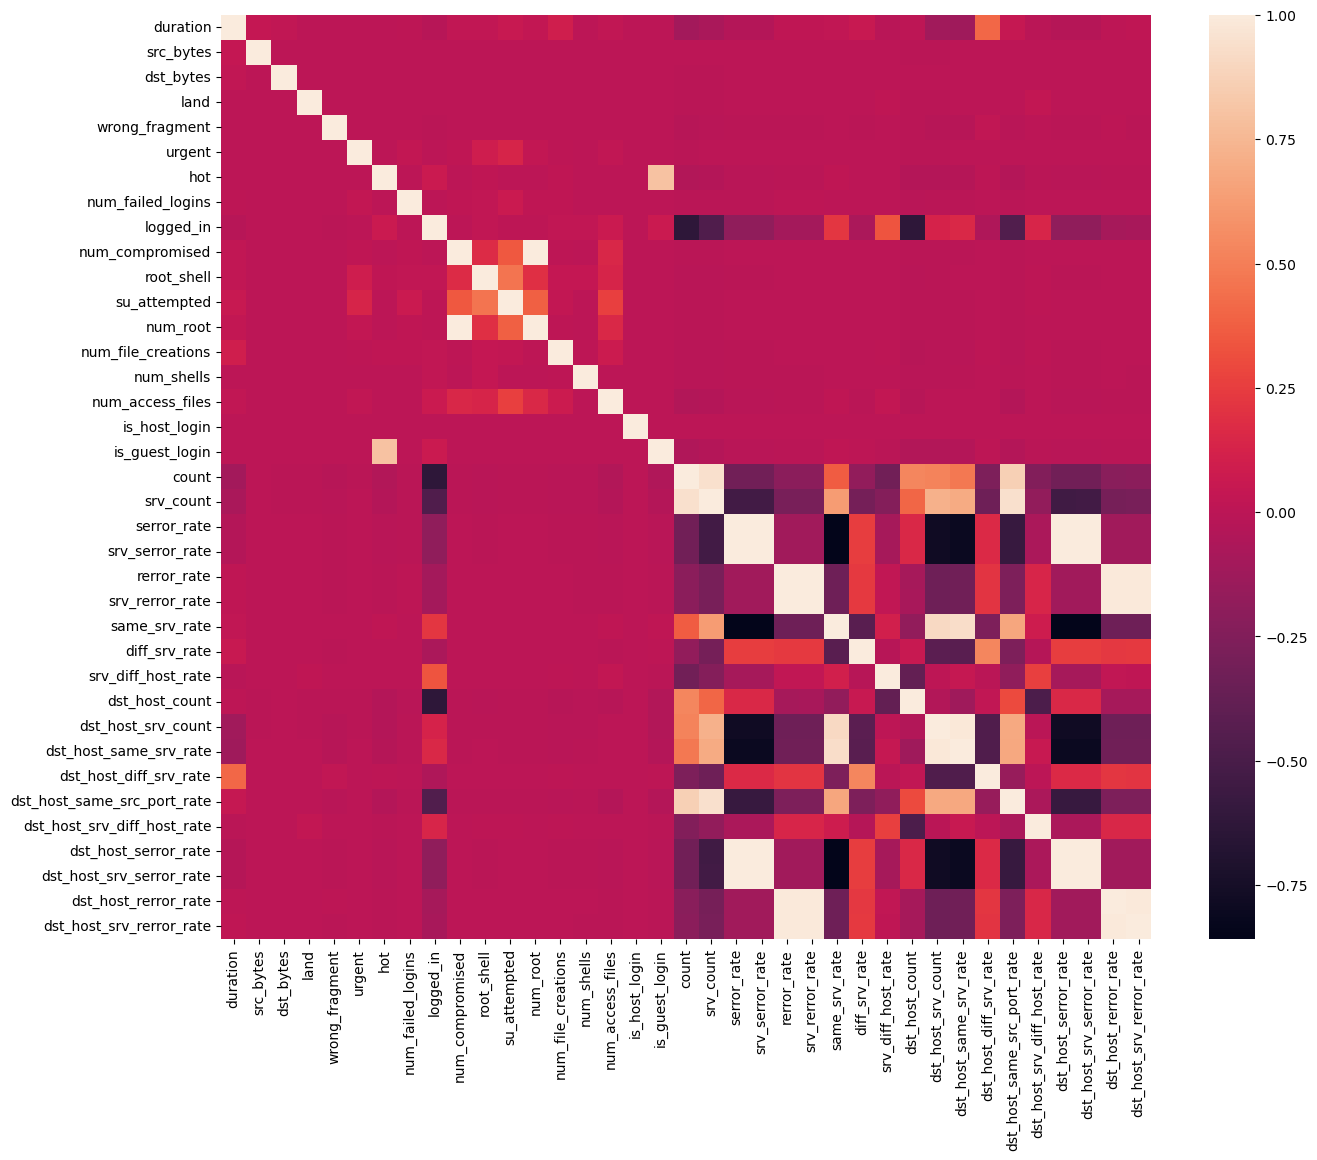

In [11]:
plt.figure(figsize=(15,12))
sns.heatmap(df2.corr())
plt.show()

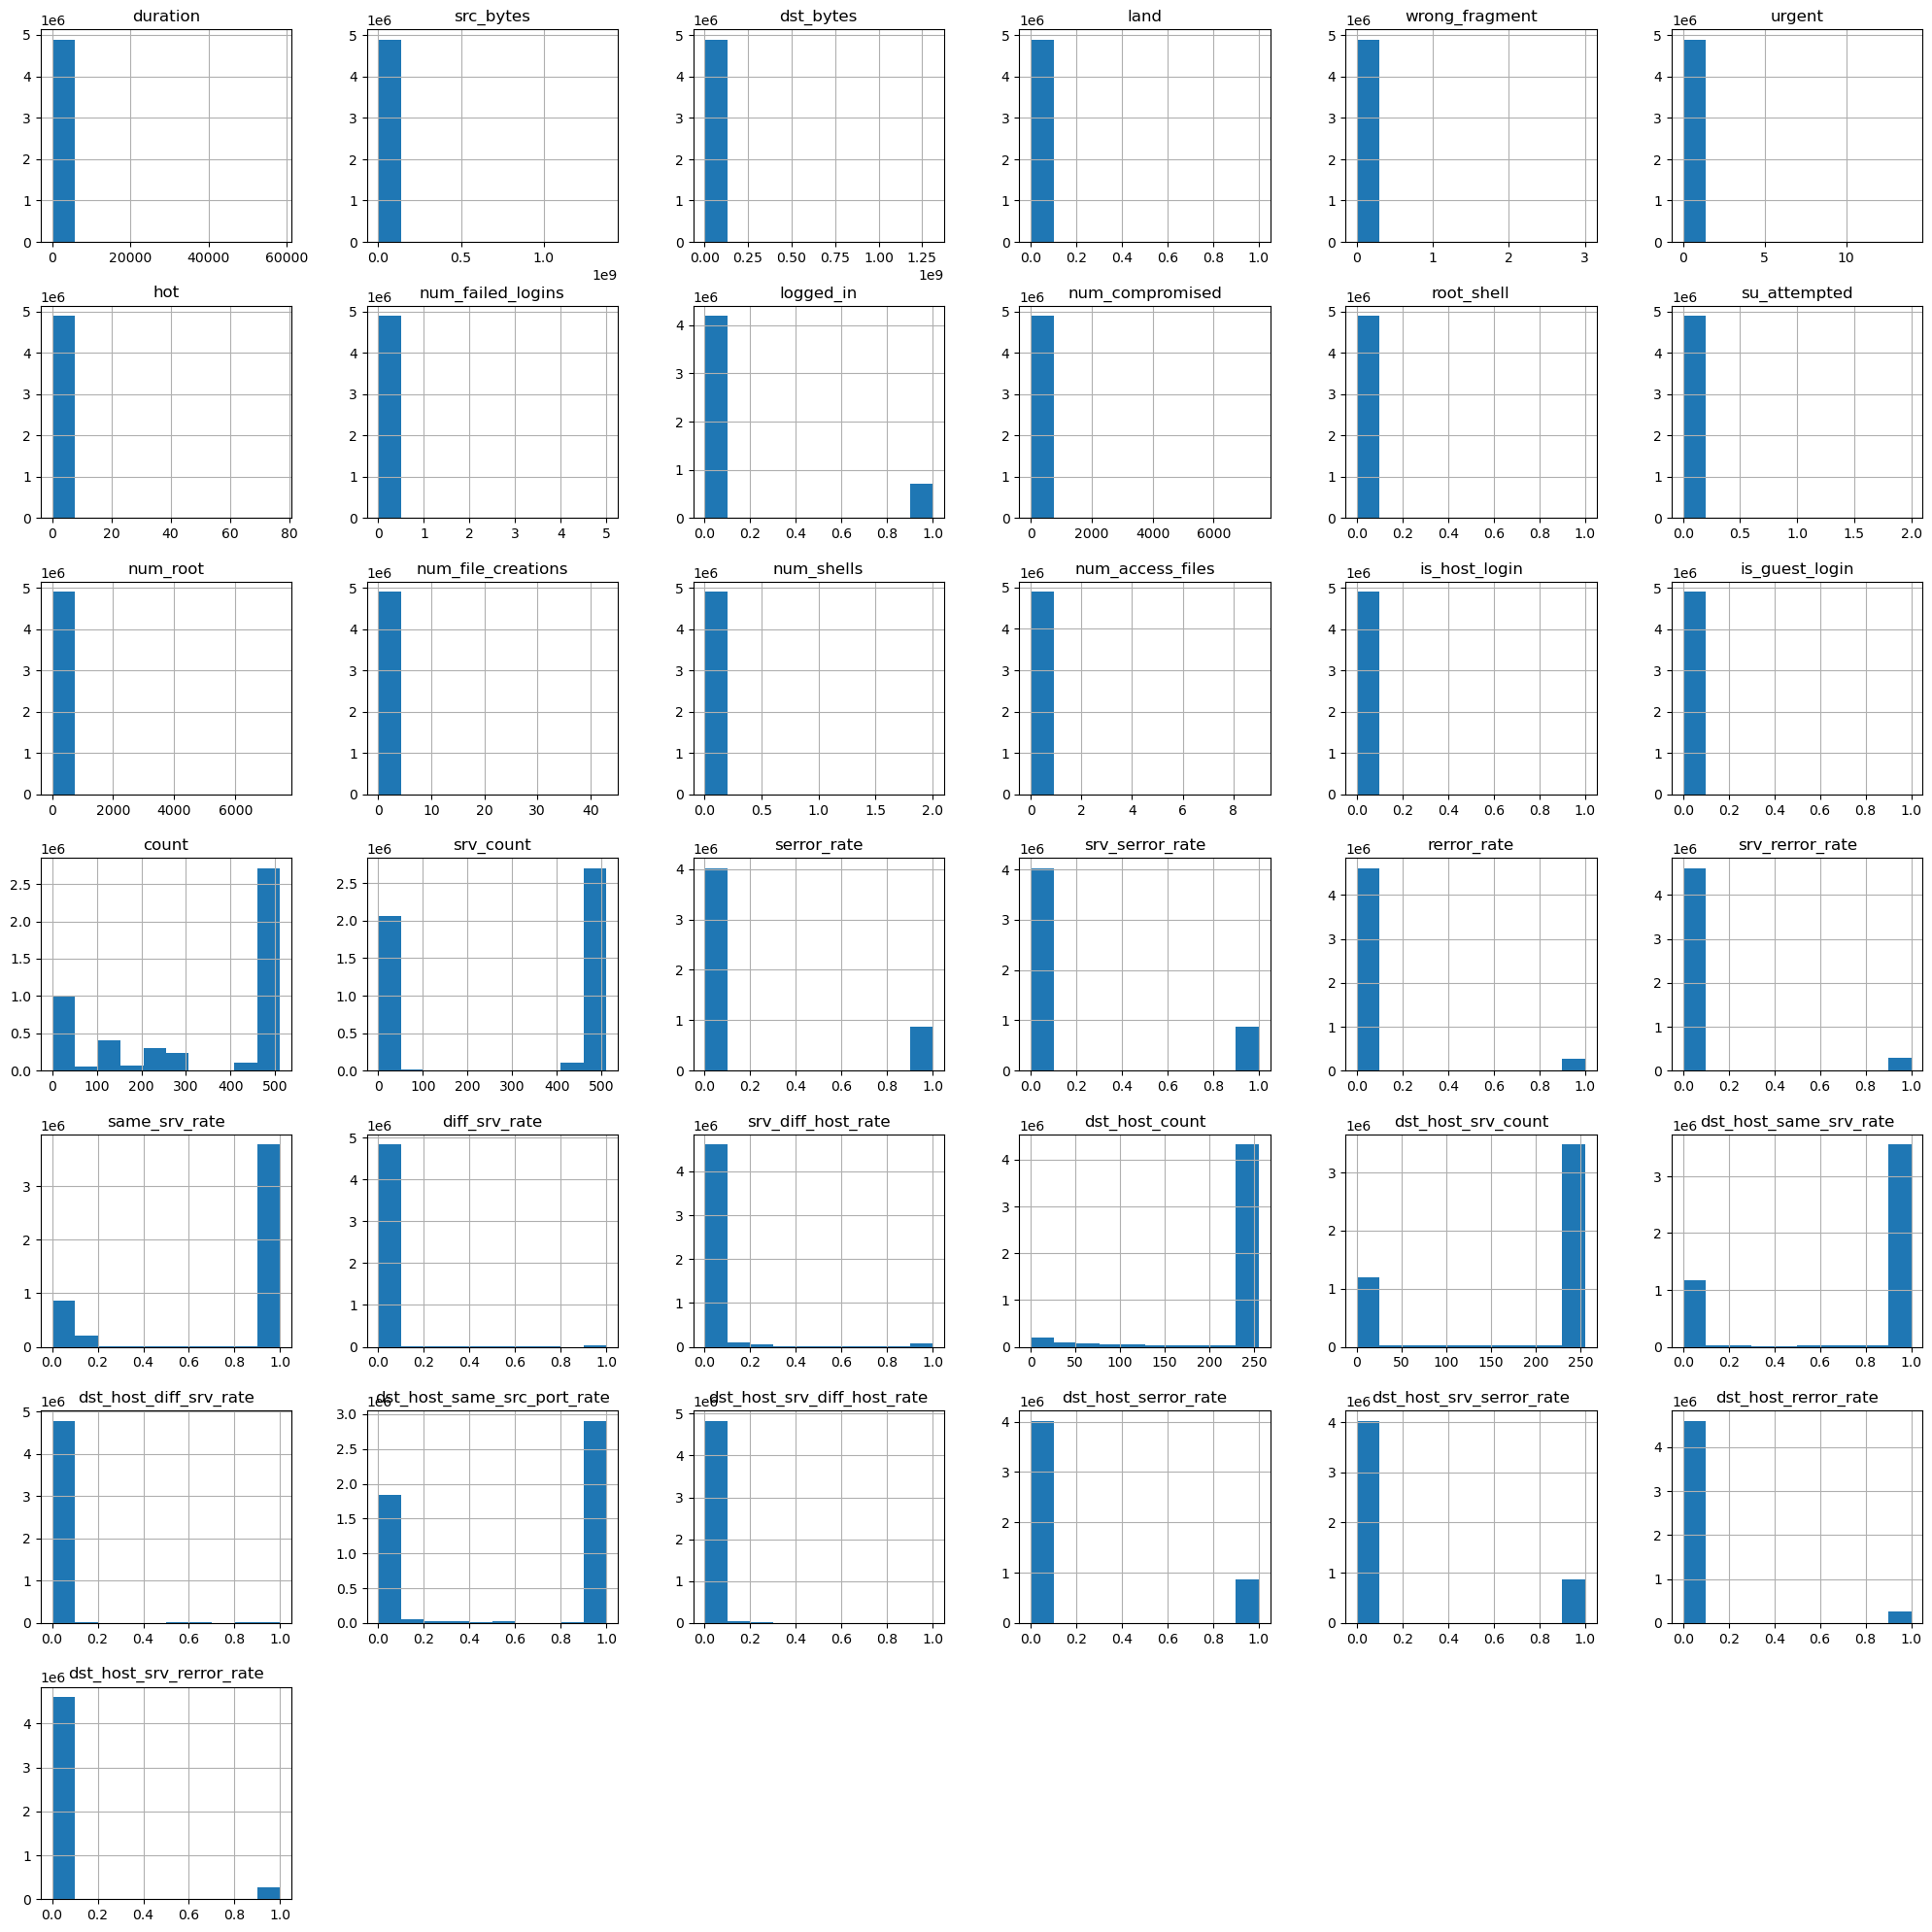

In [12]:
df2.hist(figsize = (25,25))
plt.show()

In [24]:
import matplotlib.pyplot as plt
import tensorflow as tf

train = pd.read_csv("./dataset/kddcup.data.gz")
synthetic_data = tf.keras.models.load_model('./ML/GAN/gan.h5')

ConversionError: Failed to convert value(s) to axis units: array(['tcp', 'tcp', 'tcp', ..., 'tcp', 'tcp', 'tcp'], dtype=object)

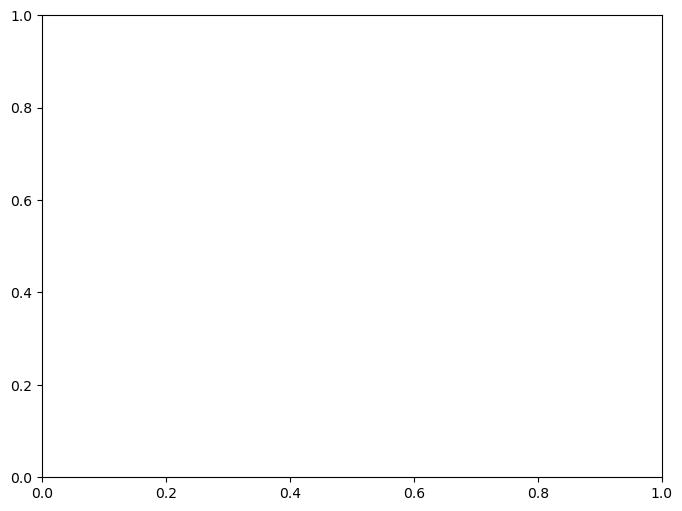

In [25]:
# Plot distributions of 'dst_bytes' feature
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(train, bins=50, alpha=0.5, label='KDD99')
ax.hist(synthetic_data[:,19], bins=50, alpha=0.5, label='GAN')
ax.set_xlabel('Destination Bytes')
ax.set_ylabel('Count')
ax.legend()
plt.show()